<a href="https://colab.research.google.com/github/NanaAkwasiAbayieBoateng/Machine-Learning-Interpretability/blob/master/Interpretability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Introduction
Machine learning algorithms are often said to be black-box models in that there is not a good idea of how the model is arriving at predictions.This has often hindered adopting machine learning models in certain industires where interpretation is key. Examples such areas include  financial institutions who are regulated and have to explain decisions such as rejecting loan application or detecting fraud. Model interprtability aalows you to determine how much you can trust a prediction model as a whole and provides insights that can be used to improve the model.

First we need to install the libraries for machine learning intrepatabilty and model building.
The dataset fro this post can be found here [here](https://archive.ics.uci.edu/ml/datasets/adult). The data has features to  predict whether income exceeds $50K/yr based on census data. It is also known as "Census Income" dataset.

#### Install  Packages

In [3]:
!pip  install   matplotlib 
!pip install eli5
#pdpbox has some problems in their pypi version
!pip install git+https://github.com/SauceCat/PDPbox
!pip install eli5
!pip install pycebox
!pip install ml_insights
!pip install scikit-optimize
!pip install alepython

#or
#!conda install -c conda-forge shap
!pip install shap
!pip install plotly_express
!pip install seaborn
!pip install category_encoders
!conda install -c conda-forge category_encoders
!pip install --upgrade git+https://github.com/scikit-learn-contrib/categorical-encoding
! pip install lime
!pip install graphviz  
!pip install skll

  Cloning https://github.com/SauceCat/PDPbox to /tmp/pip-req-build-eqle6twy
  Running command git clone -q https://github.com/SauceCat/PDPbox /tmp/pip-req-build-eqle6twy
     |████████████████████████████████| 13.0MB 3.5MB/s 
  Stored in directory: /tmp/pip-ephem-wheel-cache-pk6cb4bu/wheels/0d/9e/75/2b0f9557dd49ca0d0ae1f28398514e6b891c3305f904b472d1
Successfully built PDPbox
ERROR: lime 0.1.1.33 has requirement matplotlib==2.1.0, but you'll have matplotlib 3.0.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: matplotlib 2.1.0
    Uninstalling matplotlib-2.1.0:
      Successfully uninstalled matplotlib-2.1.0


  ERROR: Could not find a version that satisfies the requirement alepython (from versions: none)
ERROR: No matching distribution found for alepython
/bin/bash: conda: command not found
  Cloning https://github.com/scikit-learn-contrib/categorical-encoding to /tmp/pip-req-build-qx2e2vy5
  Running command git clone -q https://github.com/scikit-learn-contrib/categorical-encoding /tmp/pip-req-build-qx2e2vy5
  Stored in directory: /tmp/pip-ephem-wheel-cache-zc4d_gc8/wheels/94/ac/6d/fe3feae87e68e96dd9d4ab262c1858312af15d4076fd23656f
Successfully built category-encoders
  Found existing installation: category-encoders 2.0.0
    Uninstalling category-encoders-2.0.0:
      Successfully uninstalled category-encoders-2.0.0
  Using cached https://files.pythonhosted.org/packages/b2/9c/fcc9cfbf2454d93be66a615657cda4184954b4b67b9fc07c8511ff152b8f/matplotlib-2.1.0-cp36-cp36m-manylinux1_x86_64.whl
ERROR: pdpbox 0.2.0+13.g73c6966 has requirement matplotlib>=2.1.2, but you'll have matplotlib 2.1.0 which 

In [1]:
# Load All Libraries
from __future__ import print_function
# future allows compatitbility between python two and three modules
print(__doc__)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.base import TransformerMixin
from sklearn.metrics import classification_report, f1_score, accuracy_score, precision_score, confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lime import lime_text
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
import sklearn
import sklearn.datasets
import sklearn.ensemble
import sklearn
import numpy as np
import pandas as pd
import lightgbm as lgb
from sklearn.datasets import load_boston
import xgboost as xgb
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import *
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn import preprocessing
import plotly_express as px
import datetime
from datetime import *
import seaborn as sns; sns.set()
import shap
import warnings
from eli5.sklearn import PermutationImportance
from sklearn.preprocessing import Imputer
from sklearn.model_selection import  cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer
from sklearn.ensemble import RandomForestRegressor
#import alepython

from skll.metrics import spearman

from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer


warnings.filterwarnings("ignore", category=FutureWarning)
#from __future__ import print_function

Automatically created module for IPython interactive environment


#### Loading Data

[link to data](https://archive.ics.uci.edu/ml/datasets/Heart+Disease)
This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to this date. The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4.

Content

Attribute Information: 
Only 14 attributes used: 
1. age: age in years
2. sex: sex (1 = male; 0 = female) 
3. cp: chest pain type 
        -- Value 1: typical angina 
        -- Value 2: atypical angina 
        -- Value 3: non-anginal pain 
        -- Value 4: asymptomatic  
4. trestbps: resting blood pressure (in mm Hg on admission to the hospital)  
5. chol: serum cholestoral in mg/dl
6. fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 
7. restecg: resting electrocardiographic results 
            -- Value 0: normal 
            -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or                  depression of > 0.05 mV) 
        -- Value 2: showing probable or definite left ventricular hypertrophy by Estes'                    criteria  
8. thalach: maximum heart rate achieved  
9. exang: exercise induced angina (1 = yes; 0 = no)
10. oldpeak = ST depression induced by exercise relative to rest  
11. slope: the slope of the peak exercise ST segment 
           -- Value 1: upsloping 
            -- Value 2: flat 
            -- Value 3: downsloping  
12. ca: number of major vessels (0-3) colored by flourosopy  
13.  thal: 3 = normal; 6 = fixed defect; 7 = reversable defect 
14. target: diagnosis of heart disease (angiographic disease status) 
-- Value 0: < 50% diameter narrowing 
-- Value 1: > 50% diameter narrowing 
(in any major vessel: attributes 59 through 68 are vessels) 



In [0]:
import numpy as np
import pandas as pd
from google.colab import files
import io

In [3]:
uploaded = files.upload()

Saving heart.csv to heart.csv


In [4]:
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

User uploaded file "heart.csv" with length 11021 bytes


In [0]:
#uploaded

In [5]:
heart_data=pd.read_csv(io.StringIO(uploaded['heart.csv'].decode('utf-8')))
heart_data.head()

age  sex  cp  trestbps  chol  fbs  ...  exang  oldpeak  slope  ca  thal  target
0   63    1   3       145   233    1  ...      0      2.3      0   0     1       1
1   37    1   2       130   250    0  ...      0      3.5      0   0     2       1
2   41    0   1       130   204    0  ...      0      1.4      2   0     2       1
3   56    1   1       120   236    0  ...      0      0.8      2   0     2       1
4   57    0   0       120   354    0  ...      1      0.6      2   0     2       1

[5 rows x 14 columns]

In [0]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [0]:

heart_data.describe()

age    trestbps        chol  ...     oldpeak          ca      target
count  303.000000  303.000000  303.000000  ...  303.000000  303.000000  303.000000
mean    54.366337  131.623762  246.264026  ...    1.039604    0.729373    0.544554
std      9.082101   17.538143   51.830751  ...    1.161075    1.022606    0.498835
min     29.000000   94.000000  126.000000  ...    0.000000    0.000000    0.000000
25%     47.500000  120.000000  211.000000  ...    0.000000    0.000000    0.000000
50%     55.000000  130.000000  240.000000  ...    0.800000    0.000000    1.000000
75%     61.000000  140.000000  274.500000  ...    1.600000    1.000000    1.000000
max     77.000000  200.000000  564.000000  ...    6.200000    4.000000    1.000000

[8 rows x 7 columns]

#### Model Training
We will train a binary classification model using  xgboost model to predict Income of a person using features in the dataset above.

In [0]:
d=pd.DataFrame(heart_data.target.value_counts())

d=d.reset_index()

d.columns=['Prediction','Frequency']

d['Prediction']=d['Prediction'].astype('category')
d['Prediction']=d['Prediction'].astype(str)
d
d['Heart_Diseae']=['Present','Absent']
#d.dtypes()
d.info()

px.bar(d, x="Heart_Diseae", y="Frequency",orientation="v", color='Heart_Diseae')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 3 columns):
Prediction      2 non-null object
Frequency       2 non-null int64
Heart_Diseae    2 non-null object
dtypes: int64(1), object(2)
memory usage: 128.0+ bytes


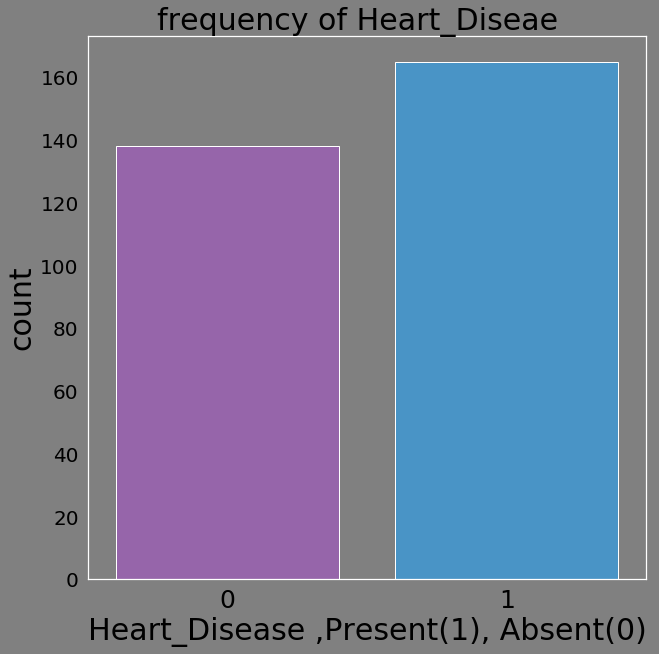

In [0]:
bg_color = (0.5, 0.5, 0.5)

sns.set(rc={"font.style":"normal",
            "axes.facecolor":bg_color,
            "axes.titlesize":30,
            "figure.facecolor":bg_color,
            "text.color":"black",
            "xtick.color":"black",
            "ytick.color":"black",
            "axes.labelcolor":"black",
            "axes.grid":False,
            'axes.labelsize':30,
            'figure.figsize':(10.0, 10.0),
            'xtick.labelsize':25,
            'ytick.labelsize':20})

#plt.rcParams.update(params)
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
sns.countplot(heart_data.target,palette=flatui)
plt.xlabel('Heart_Disease ,Present(1), Absent(0)')
plt.title('frequency of Heart_Diseae  ')
plt.show()

In [0]:
X=heart_data.drop('target',axis=1)
Y=heart_data.target
scaler = StandardScaler()

#X = scaler.fit_transform(X)


train_X, val_X, train_y, val_y = train_test_split(X, Y,test_size=0.3, random_state=148)

#### Categorical Variable Encoding

In [7]:
from category_encoders import *
import pandas as pd
from sklearn.datasets import load_boston

# prepare some data
#bunch = load_boston()
#y_train = bunch.target[0:250]
#y_test = bunch.target[250:506]
#X_train = pd.DataFrame(bunch.data[0:250], columns=bunch.feature_names)
#X_test = pd.DataFrame(bunch.data[250:506], columns=bunch.feature_names)

# use target encoding to encode two categorical features
#enc = TargetEncoder(cols=['CHAS', 'RAD']).fit(train_X,train_y)
enc = TargetEncoder(cols=['sex', 'cp','fbs','restecg','exang','slope','thal']).fit(train_X,train_y)

# transform the datasets
training_numeric_dataset = enc.transform(train_X,train_y)
testing_numeric_dataset = enc.transform(val_X)

training_numeric_dataset.head()
training_numeric_dataset.thal.value_counts()

0.773109    119
0.246753     77
0.357143     14
0.513955      2
Name: thal, dtype: int64

#### Converting Numerical to Categorical

In [8]:
cat_cols=['sex', 'cp','fbs','restecg','exang','slope','thal']

heart_data[cat_cols] = heart_data[cat_cols].apply(lambda x: x.astype('category'))


heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null category
cp          303 non-null category
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null category
restecg     303 non-null category
thalach     303 non-null int64
exang       303 non-null category
oldpeak     303 non-null float64
slope       303 non-null category
ca          303 non-null int64
thal        303 non-null category
target      303 non-null int64
dtypes: category(7), float64(1), int64(6)
memory usage: 19.6 KB


In [9]:
cat_cols=['sex', 'cp','fbs','restecg','exang','slope','thal']

for col_name in cat_cols:
    #if(heart_data[col_name].dtype == 'object'):
        heart_data[col_name]= heart_data[col_name].astype('category')
        #heart_data[col_name] = heart_data[col_name].cat.codes
        

#heart_data[cat_cols] = heart_data[cat_cols].apply(lambda x: x.astype('category'))



heart_data.head(3)
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null category
cp          303 non-null category
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null category
restecg     303 non-null category
thalach     303 non-null int64
exang       303 non-null category
oldpeak     303 non-null float64
slope       303 non-null category
ca          303 non-null int64
thal        303 non-null category
target      303 non-null int64
dtypes: category(7), float64(1), int64(6)
memory usage: 19.6 KB


In [10]:
#lightgbm.Dataset(data, label=None, reference=None, weight=None,
#                 group=None, init_score=None, silent=False,
#                 feature_name='auto', categorical_feature='auto',
#                 params=None, free_raw_data=True)[source]



train_data=lgb.Dataset(train_X ,label=train_y,feature_name='auto', categorical_feature=cat_cols)


lgb_train = lgb.Dataset(train_X ,label=train_y
 ,feature_name = X.columns
 , categorical_feature = cat_cols
)


#params = {
# 'task': 'train'
# , 'boosting_type': 'gbdt'
# , 'objective': 'regression' if is_regression == True else 'multiclass'
#   ,'objective': 'binary'    
# , 'num_class': num_of_classes
# , 'metric': 'rmsle' if is_regression == True else 'multi_logloss'
# , 'min_data': 1
# , 'verbose': -1
#}
 
#lgbm = lgb.train(params, lgb_train, num_boost_round=50)



params = {'num_leaves':150, 
         'objective':'binary',
         'max_depth':7,
         'learning_rate':.05,
         'is_unbalance':True,
         'max_bin':200}
params['metric'] = ['auc', 'binary_logloss']


cv_results = lgb.cv(
        params,
        train_data,
        num_boost_round=100,
        nfold=3,
        #metrics='mae',
        early_stopping_rounds=10
        )



/usr/local/lib/python3.6/dist-packages/lightgbm/basic.py:1205: UserWarning:

Using categorical_feature in Dataset.



In [11]:
# Display results
print('Current parameters:\n', params)
print('\nBest num_boost_round:', len(cv_results['auc-mean']))
print('Best CV score:', cv_results['auc-mean'][1])

#cv_results.best_params_

Current parameters:
 {'num_leaves': 150, 'objective': 'binary', 'max_depth': 7, 'learning_rate': 0.05, 'is_unbalance': True, 'max_bin': 200, 'metric': ['auc', 'binary_logloss']}

Best num_boost_round: 26
Best CV score: 0.8124483043837882


In [0]:
#setting parameters for lightgbm

#train_data=lgb.Dataset(train_X ,label=train_y)

param = {'num_leaves':150, 
         'objective':'binary',
         'max_depth':7,
         'learning_rate':.05,
         'is_unbalance':True,
         'max_bin':200}
param['metric'] = ['auc', 'binary_logloss']


#training our model using light gbm
num_round=50
start=datetime.now()
lgbm=lgb.train(param,train_data,num_round,feature_name='auto', categorical_feature=cat_cols)
stop=datetime.now()


#lgb_estimator = lgb.LGBMClassifier(boosting_type='gbdt')
#Equivalent way of fitting light gbm

lgb_estimator = lgb.LGBMClassifier(boosting_type='gbdt',
                        # class_weight='balanced', #used only in multiclass training
                         #is_unbalance ='True'   #used in binary class training    
                         objective='binary',
                         n_jobs=-1, 
                         verbose=0)

lgb_model = lgb_estimator.fit(X=train_X, y=train_y)

In [13]:
#Execution time of the model
execution_time_lgbm = stop-start
execution_time_lgbm

datetime.timedelta(0, 0, 37571)

In [0]:
#predicting the target label on test set
ypred=lgbm.predict(val_X)
print(ypred[0:5])  # showing first 5 predictions

#predicting the target probability on test set
#yprob=lgbm.predict_proba(val_X)
#print(yprob[0:2])  # showing first 5 predictions


[0.84144207 0.48859939 0.93763193 0.86565699 0.10644411]


In [0]:
#predicting the target label on test set
ypred=lgb_model.predict(val_X)
print(ypred[0:5])  # showing first 5 predictions

#predicting the target probability on test set
yprob=lgb_model.predict_proba(val_X)
print(yprob[0:2])  # showing first 5 predictions


[1 1 1 1 0]
[[0.06968765 0.93031235]
 [0.38360334 0.61639666]]


In [14]:
predictions = lgb_model.predict(val_X)
print("Confusion Matrix:")

cm=confusion_matrix(val_y, predictions)

print(cm)

print()
print("Classification Report")
print(classification_report(val_y, predictions))

# ROC curve and Area-Under-Curve (AUC)
#calculating accuracy
accuracy_lgbm = accuracy_score(predictions,val_y)

print('accuracy score : {:0.3f}'.format( accuracy_lgbm))

roc_auc_lgbm = roc_auc_score(val_y,predictions)

print('roc score : {:0.3f}'.format( roc_auc_lgbm))

Confusion Matrix:
[[33 10]
 [ 7 41]]

Classification Report
              precision    recall  f1-score   support

           0       0.82      0.77      0.80        43
           1       0.80      0.85      0.83        48

   micro avg       0.81      0.81      0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91

accuracy score : 0.813
roc score : 0.811


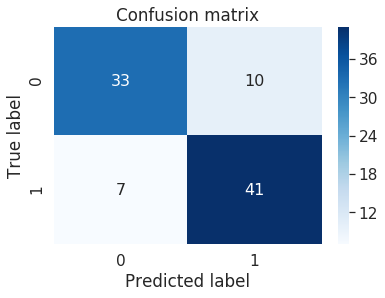

In [0]:
import seaborn as sn
        
df_cm = pd.DataFrame(cm, range(2),
                  range(2))
#plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
# Show confusion matrix in a separate window
#plt.matshow(cm)
sn.heatmap(df_cm, annot=True,annot_kws={"size": 16},cmap=plt.cm.Blues)# font size
plt.title('Confusion matrix')
#plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

#### Plotting Model Inferences  From lightgbm Library

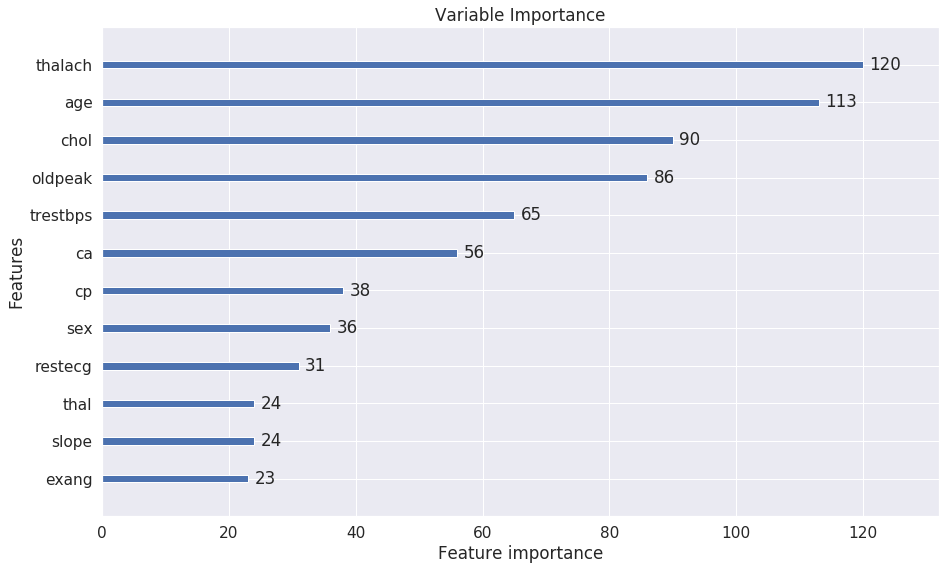

In [0]:
lgb.plot_importance(lgb_model,title='Variable Importance')
plt.show()

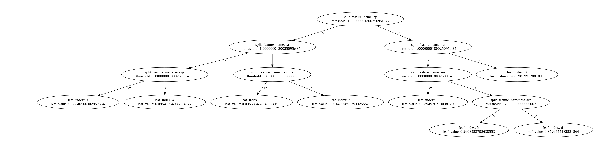

In [0]:

#plt.figure(figsize=(10,10))
lgb.plot_tree(lgb_model)
plt.show()

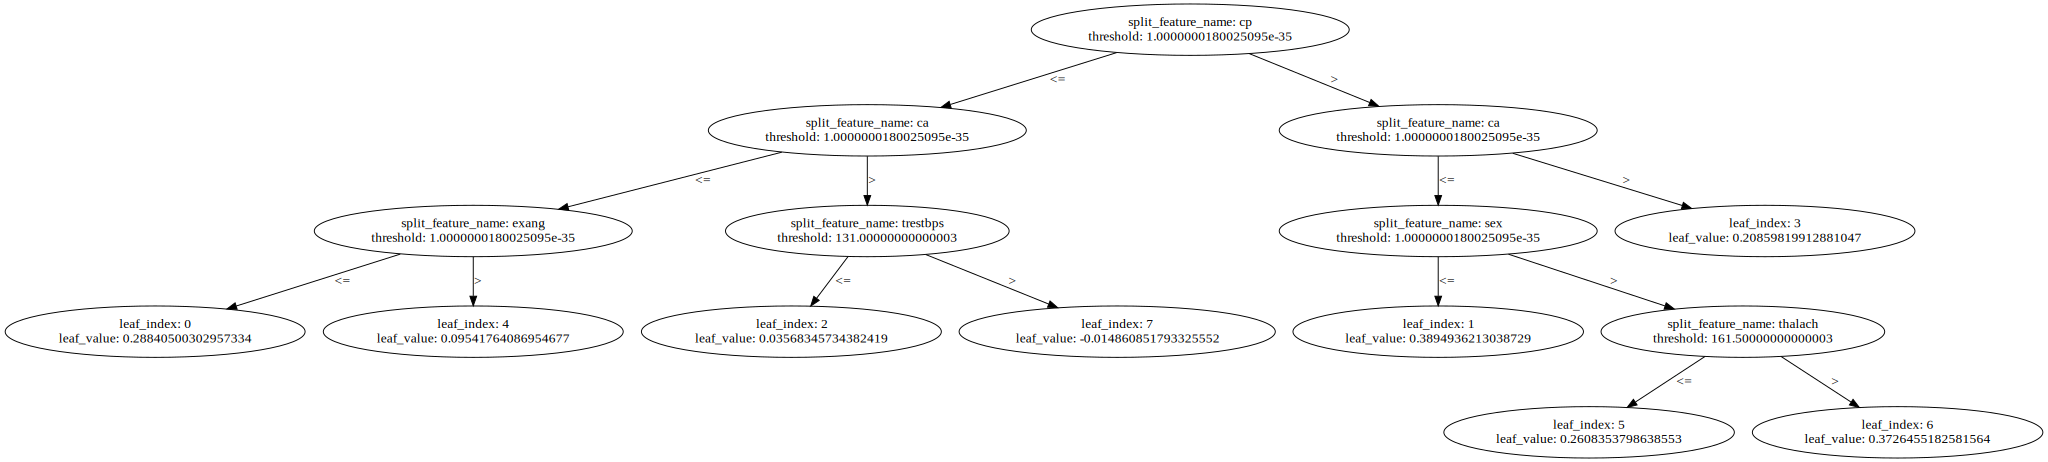

In [0]:
lgb.create_tree_digraph(lgb_model)

####  Permutation Importance


The eli5 package  provides a way to compute feature importances for any black-box estimator by measuring how score decreases when a feature is not available; the method is also known as “permutation importance” or “Mean Decrease Accuracy (MDA)”. The method picks  a feature and shuffles its values whilst keeping the other features fixed. The feature importance can be measured by calculating  how much the score (accuracy, F1, R^2, etc. - any score we’re interested in) decreases when a feature is not available. The greater the decrease in the score the more important that feature  is predicting the target variable. This process is repeated for all other features in the model to arrive at feature importance for each variable in the model. The features are arranged in decreasing order of importance.

ELI5 is a Python package which helps to debug machine learning classifiers and explain their predictions. It supports popular ML libraries such as scikit-learn, xgboost, LightGBM and lightning.It can be used to compute feature importances for black box estimators using the permutation importance method. 




In [0]:
from eli5.sklearn import PermutationImportance
from eli5.sklearn import *
import eli5
from eli5.permutation_importance import get_score_importances


perm = PermutationImportance(lgb_model, random_state=1).fit(train_X ,train_y)
eli5.show_weights(perm, feature_names=train_X.columns.tolist())

In [0]:
# plot the distributions
from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 15,9

perm_train_feat_imp_df = pd.DataFrame(data=perm.results_,
                                      columns=X.columns)

perm_train_feat_imp_df

age       sex        cp  ...     slope        ca      thal
0  0.047170  0.028302  0.061321  ...  0.014151  0.127358  0.014151
1  0.042453  0.037736  0.047170  ...  0.000000  0.084906  0.009434
2  0.037736  0.051887  0.051887  ...  0.004717  0.136792  0.009434
3  0.070755  0.051887  0.047170  ...  0.009434  0.108491  0.004717
4  0.023585  0.028302  0.056604  ...  0.009434  0.122642  0.014151

[5 rows x 13 columns]

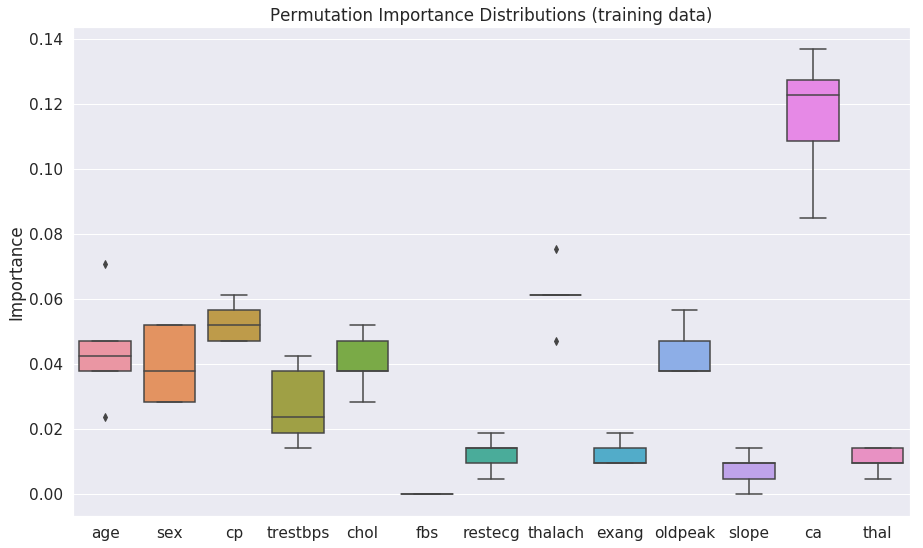

In [0]:


#perm_train_feat_imp_df = perm_train_feat_imp_df.sort_values(by=['ca'], ascending=False)

(sns.boxplot(data=perm_train_feat_imp_df)
        .set(title='Permutation Importance Distributions (training data)',
             ylabel='Importance'));

In [0]:
# create our dataframe of feature importances
feat_imp_df = eli5.explain_weights_df(estimator =lgb_model, feature_names=train_X.columns.tolist())
feat_imp_df

feature    weight
0         cp  0.213396
1         ca  0.152011
2    thalach  0.120438
3    oldpeak  0.088585
4        age  0.087723
5       thal  0.075832
6       chol  0.055701
7      slope  0.053130
8      exang  0.049817
9   trestbps  0.041723
10       sex  0.033521
11   restecg  0.028123
12       fbs  0.000000

In [0]:
# get the estimator and imputer from our pipeline, which will be used
# as we try and interpret our model
#estimator = search.best_estimator_.named_steps['estimator']
estimator =lgb_model
#imputer = search.best_estimator_.named_steps['imputer']

estimator.feature_importances_

array([113,  36,  38,  65,  90,   0,  31, 120,  23,  86,  24,  56,  24])

In [0]:
from matplotlib import pyplot as plt
from pdpbox import pdp, get_dataset, info_plots
from sklearn.ensemble.partial_dependence import partial_dependence, plot_partial_dependence
# import machine learning algorithms
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

# get the feature importances from each tree and then visualize the
# distributions as boxplots
my_model = GradientBoostingClassifier()
my_model.fit(X=train_X, y=train_y)

all_feat_imp_df = pd.DataFrame(data=[tree.feature_importances_ for tree in 
                                     my_model],
                               columns=X.columns)

(sns.boxplot(data=all_feat_imp_df)
        .set(title='Feature Importance Distributions',
             ylabel='Importance'));

AttributeError: ignored

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

def plotImp(model, X , num = 20):
    feature_imp = pd.DataFrame(sorted(zip(model.feature_importances_(),X.columns)), 
                               columns=['Value','Feature'])
    plt.figure(figsize=(40, 20))
    sns.set(font_scale = 5)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", 
                                                        ascending=False)[0:num])
    plt.title('LightGBM Features (avg over folds)')
    plt.tight_layout()
    plt.show()
    plt.savefig('lgbm_importances-01.png')
    
    
plotImp(lgbm, X , num = 20)

AttributeError: ignored

In [0]:
lgb_model.feature_importances_()

TypeError: ignored

#### Partial Dependence Plots

Partial dependence plots show the marginal effect  between the predicted label/ target function from a machine learing model  and a set of  features. The limits  size of the target feature set is usually one or two. The target features are usually chosen among the most important features. A partial dependence plot can capture linear, monotonous and complex relationships between the target variable and the features of interest.


Partial dependence works by marginalizing the machine learning model output over the distribution of the features whose  partial dependence function should be plotted, so that the function shows the relationship between those features   and the predicted outcome. By marginalizing over the other features in the model , we get a function that depends only on the specified features and its interactions.







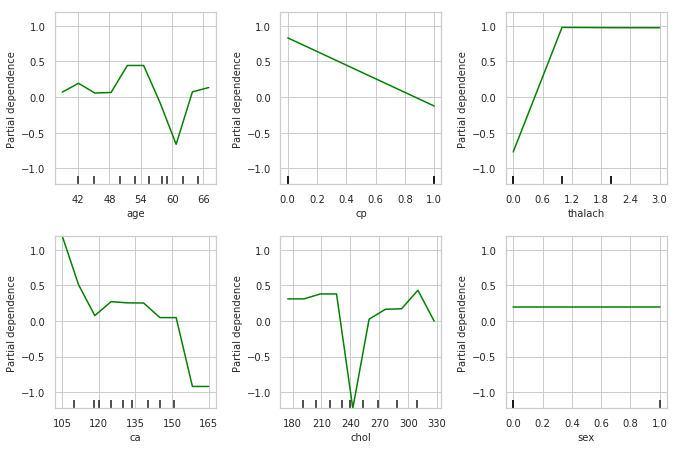

In [15]:
from matplotlib import pyplot as plt
from pdpbox import pdp, get_dataset, info_plots
from sklearn.ensemble.partial_dependence import partial_dependence, plot_partial_dependence
# import machine learning algorithms
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

bg_color = (0.5, 0.5, 0.5)

sns.set(rc={"font.style":"normal",
            "axes.facecolor":bg_color,
            "axes.titlesize":20,
            "figure.facecolor":bg_color,
            "text.color":"black",
            "xtick.color":"black",
            "ytick.color":"black",
            "axes.labelcolor":"black",
            "axes.grid":False,
            'axes.labelsize':10,
            'figure.figsize':(10.0, 10.0),
            'xtick.labelsize':10,
            'ytick.labelsize':10})
sns.set_style("whitegrid")
my_model = GradientBoostingClassifier()
my_model.fit(X=train_X, y=train_y)
# Here we make the plot
my_plots = plot_partial_dependence(my_model ,       
                                   features=[0,1, 2,3,4,5], # column numbers of plots we want to show
                                   X=train_X,            # raw predictors data.
                                   feature_names=['age','cp', 'thalach','ca','chol','sex'], # labels on graphs
                                   grid_resolution=10) # number of values to plot on x axis
plt.show()

#### Feature Contributions

In [0]:
from IPython.display import Image  
from sklearn.tree import export_graphviz
import graphviz
import pydotplus
from io import StringIO  

# source for plotting decision tree
# https://medium.com/@rnbrown/creating-and-visualizing-decision-trees-with-python-f8e8fa394176
# Get all trees of depth 2 in the random forest
depths2 = [tree for tree in estimator.estimators_ if tree.tree_.max_depth==2]
# grab the first one
tree = depths2[0]
# plot the tree
dot_data = StringIO()
export_graphviz(tree, out_file=dot_data, feature_names=features, 
                filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

AttributeError: ignored

#### Individual Conditional Expectation (ICE)

In [0]:
from pycebox.ice import ice, ice_plot

# pcyebox likes the data to be in a DataFrame so let's create one with our imputed data
# we first need to impute the missing data
train_X_imp_df = pd.DataFrame(train_X, columns=X.columns)

In [0]:
thalach_ice_df = ice(data=train_X_imp_df, column='thalach', 
                   predict=lgbm.predict)



ice_plot(thalach_ice_df , c='dimgray', linewidth=0.3)
plt.ylabel('Pred. AV %ile')
plt.xlabel('thalach');

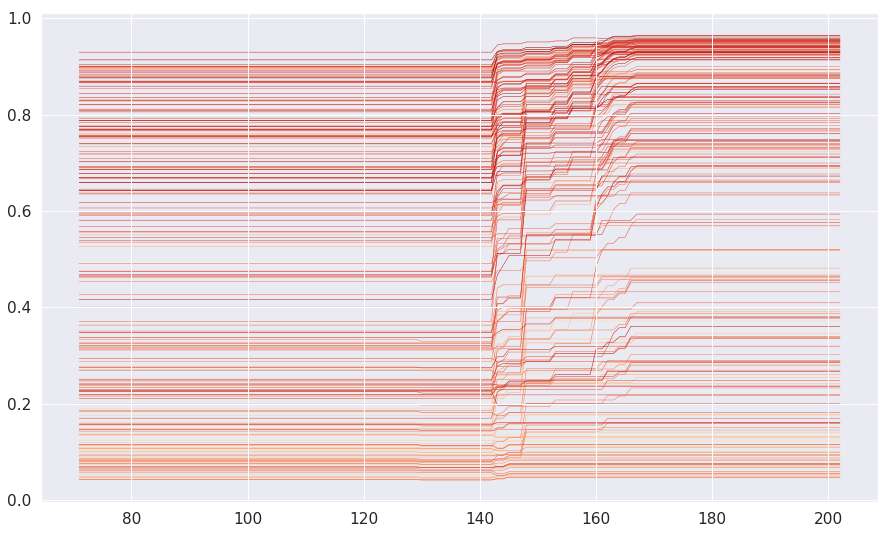

In [0]:
ice_plot(thalach_ice_df, linewidth=0.5,color_by='data_thalach', cmap=cmap2)
#wt_vals
#thalach_ice_df

In [0]:
# figure size in inches
rcParams['figure.figsize'] = 10,8
# new colormap for ICE plot
cmap2 = plt.get_cmap('OrRd')
# set color_by to Wt, in order to color each curve by that player's weight
ice_plot(thalach_ice_df, linewidth=0.5, color_by='data_thalach', cmap=cmap2)
# ice_plot doesn't return a colorbar so we have to add one
# hack to add in colorbar taken from here:
# https://stackoverflow.com/questions/8342549/matplotlib-add-colorbar-to-a-sequence-of-line-plots/11558629#11558629
wt_vals = thalach_ice_df.columns.get_level_values('data_thalach').values
sm = plt.cm.ScalarMappable(cmap=cmap2, 
                           norm=plt.Normalize(vmin=wt_vals.min(), 
                                              vmax=wt_vals.max()))
# need to create fake array for the scalar mappable or else we get an error
sm._A = []
plt.colorbar(sm, label='thalach')
plt.ylabel('Pred. AV %ile')
plt.xlabel('thalach');

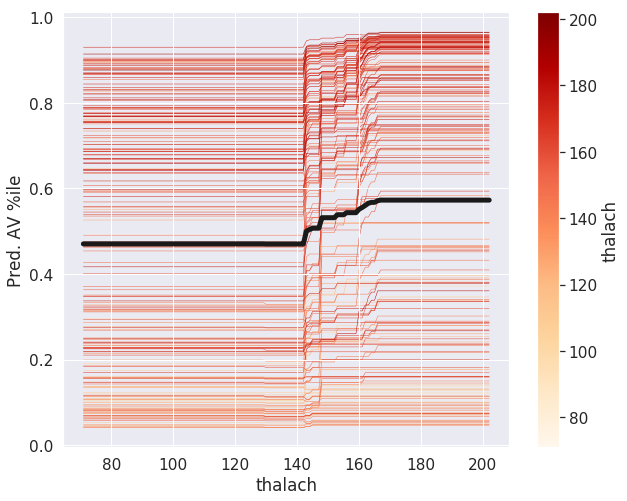

In [0]:
# figure size in inches
rcParams['figure.figsize'] = 10,8
ice_plot(thalach_ice_df, linewidth=.5, color_by='data_thalach', cmap=cmap2, plot_pdp=True, 
         pdp_kwargs={'c': 'k', 'linewidth': 5})
plt.colorbar(sm, label='thalach')
plt.ylabel('Pred. AV %ile')
plt.xlabel('thalach');

In [0]:
age_ice_df = ice(data=train_X_imp_df, column='age', 
                   predict=lgbm.predict)

# figure size in inches
rcParams['figure.figsize'] = 10,8
ice_plot(age_ice_df, linewidth=.5, color_by='data_age', cmap=cmap2, plot_pdp=True, 
         pdp_kwargs={'c': 'k', 'linewidth': 5})
plt.colorbar(sm, label='age')
plt.ylabel('Pred. AV %ile')
plt.xlabel('age');

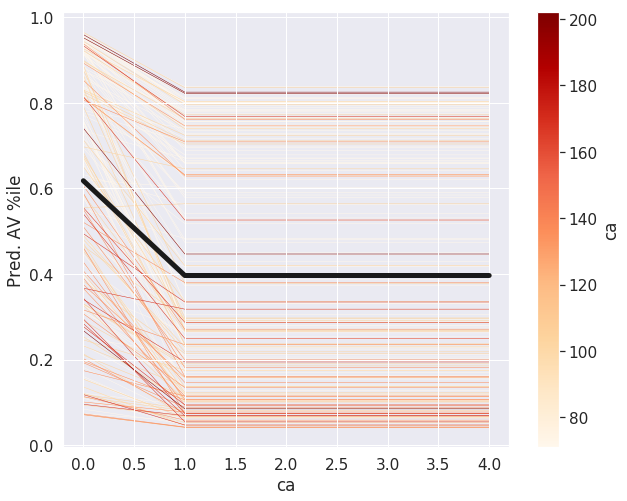

In [0]:
ca_ice_df = ice(data=train_X_imp_df, column='ca'
                   ,predict=lgbm.predict)

# figure size in inches
rcParams['figure.figsize'] = 10,8
ice_plot(ca_ice_df, linewidth=.5, color_by='data_ca', cmap=cmap2, plot_pdp=True, 
         pdp_kwargs={'c': 'k', 'linewidth': 5})
plt.colorbar(sm, label='ca')
plt.ylabel('Pred. AV %ile')
plt.xlabel('ca');

Centered ICE Plots¶
One drawback with our previous ICE plots is that the stacked nature of the lines can make it difficult to observe the differences between the ICE curves. To make it easier to spot those differences we can center or "pinch" the curves at a specific feature value. Typically the minimum is a good centering point. With these centered ICE plots we observe the relative change of the predictions with respect to the predictions at the centered value.

To center our ICE curves at the minimum Forty value we just set centered to True.

In [0]:
ice_plot(thalach_ice_df, linewidth=.5, color_by='data_thalach', cmap=cmap2, plot_pdp=True, 
         pdp_kwargs={'c': 'k', 'linewidth': 5},centered=True,__get_quantiles=True,centered_quantile=0.9)
plt.colorbar(sm, label='thalach')
plt.ylabel('Pred. AV %ile')
plt.xlabel('thalach');

NameError: ignored

Centered ICE Plots¶
One drawback with our previous ICE plots is that the stacked nature of the lines can make it difficult to observe the differences between the ICE curves. To make it easier to spot those differences we can center or "pinch" the curves at a specific feature value. Typically the minimum is a good centering point. With these centered ICE plots we observe the relative change of the predictions with respect to the predictions at the centered value.

To center our ICE curves at the minimum Forty value we just set centered to True.

####  Interpreting Partial Dependence Plots

The top left plot shows the partial dependence between our target varaible Heart disease present or absent, and the age variable in years. 

* ca: number of major vessels (0-3) colored by flourosopy, having more major vessels colored by flouroscopy reduces your risk of a heart disease.

* cp: Having chest pain type 1 (typical angina) increases your  average probability of having  a heart disease. The increasing chance of heart disease remains constant for chest pain types 2,3 and 4.
*  thalach: maximum heart rate achieved  above 120 increases your risk of heart disease.

* Being a male  slightly reduces your risk of a heart disease.
* chol: serum cholestoral in mg/dl, cholesterol level around 240 reduces your risk of heart disease. Above this level your risk goes up

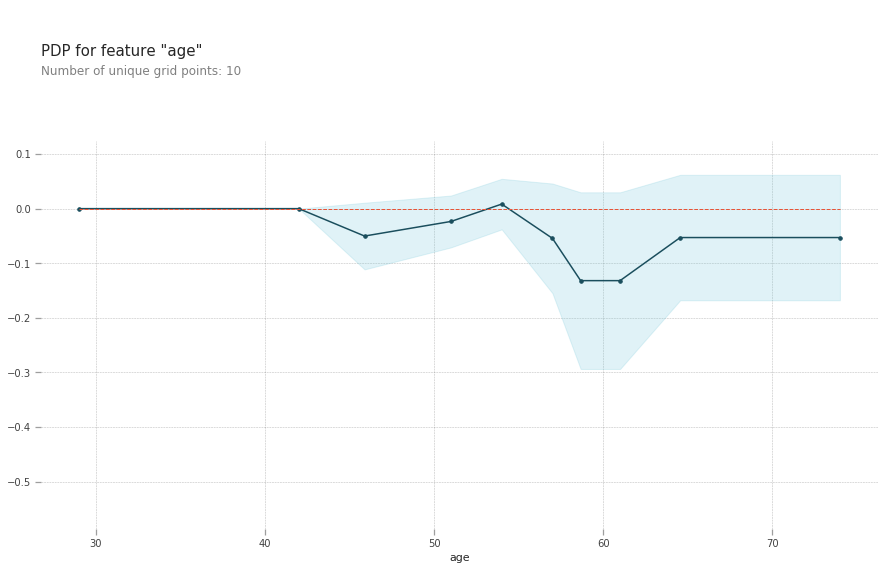

In [16]:
from matplotlib import pyplot as plt
from pdpbox import pdp, get_dataset, info_plots

# Create the data that we will plot
pdp_goals = pdp.pdp_isolate(model=lgb_model, dataset=train_X,
                            model_features=val_X.columns.tolist(), feature='age')

# plot it
pdp.pdp_plot(pdp_goals, 'age')
plt.show()

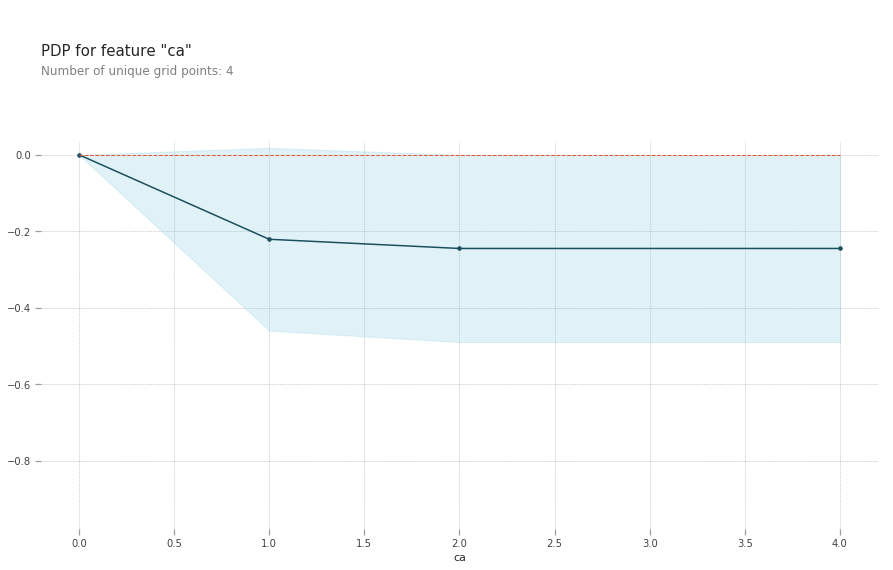

In [0]:
# Create the data that we will plot
pdp_goals = pdp.pdp_isolate(model=lgb_model, dataset=train_X,
                            model_features=val_X.columns.tolist(), feature='ca')

# plot it
pdp.pdp_plot(pdp_goals, 'ca')
plt.show()

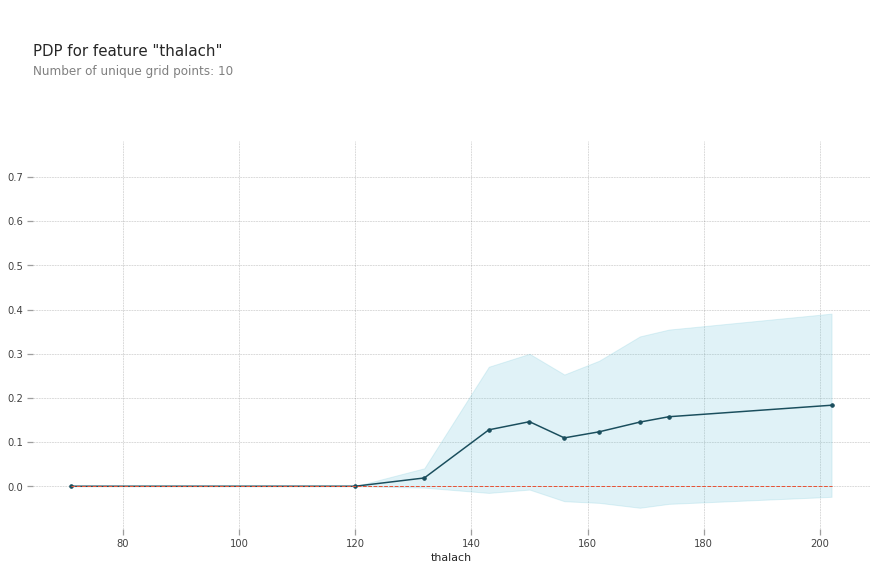

In [0]:
# Create the data that we will plot
pdp_goals = pdp.pdp_isolate(model=lgb_model, dataset=train_X,
                            model_features=val_X.columns.tolist(), feature='thalach')

# plot it
pdp.pdp_plot(pdp_goals, 'thalach')
plt.show()

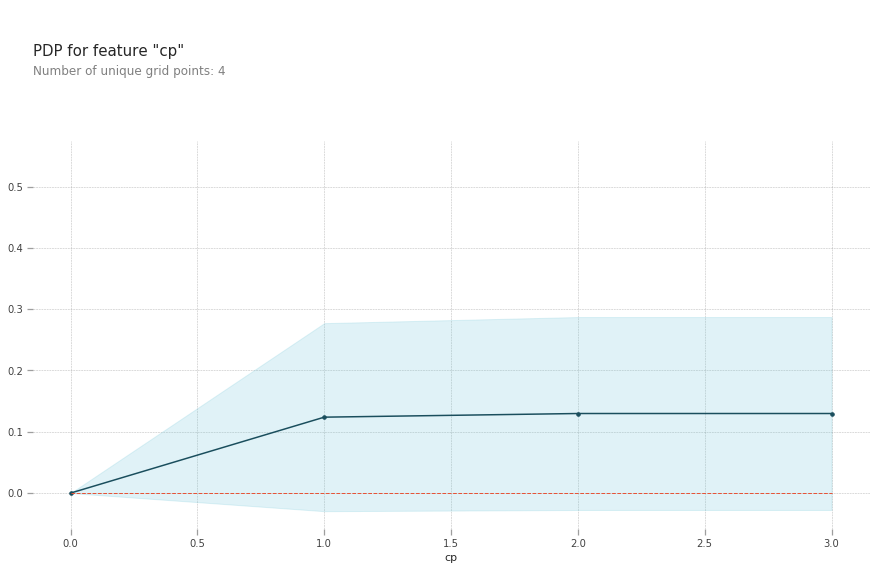

In [0]:
# Create the data that we will plot
pdp_goals = pdp.pdp_isolate(model=lgb_model, dataset=train_X,
                            model_features=val_X.columns.tolist(), feature='cp')

# plot it
pdp.pdp_plot(pdp_goals, 'cp')
plt.show()

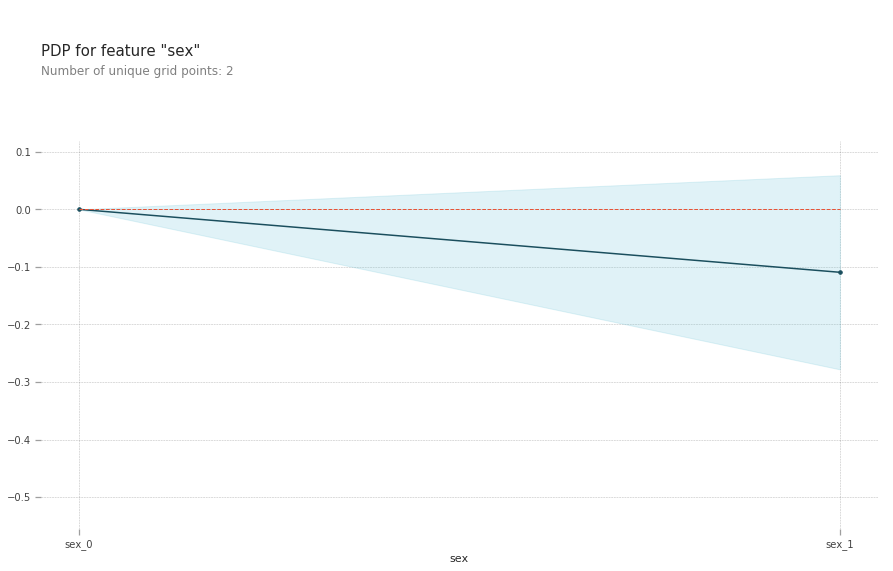

In [0]:
# Create the data that we will plot
pdp_goals = pdp.pdp_isolate(model=lgb_model, dataset=train_X,
                            model_features=val_X.columns.tolist(), feature='sex')

# plot it
pdp.pdp_plot(pdp_goals, 'sex')
plt.show()

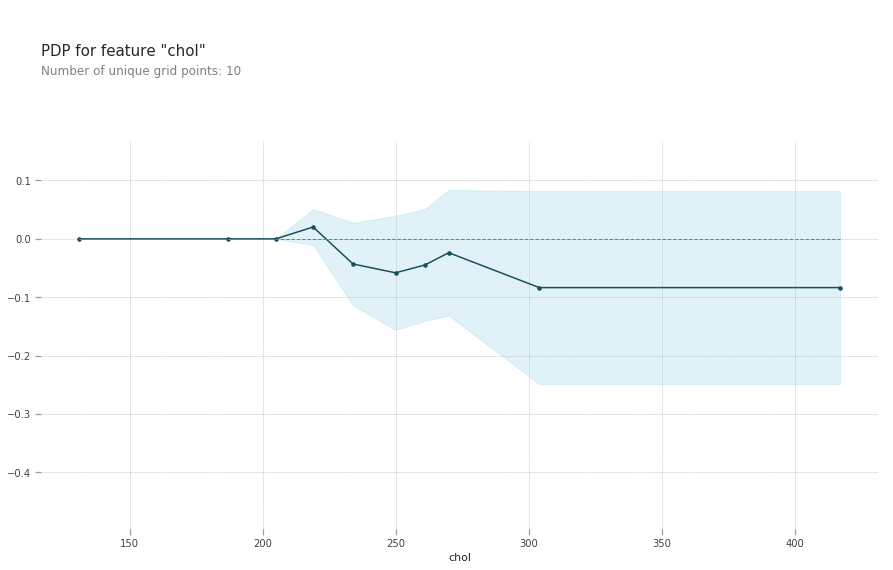

In [0]:
# Create the data that we will plot
sns.set_style("whitegrid")
pdp_goals = pdp.pdp_isolate(model=lgb_model, dataset=val_X,
                            model_features=val_X.columns.tolist(), feature='chol')

# plot it
pdp.pdp_plot(pdp_goals, 'chol')
plt.show()

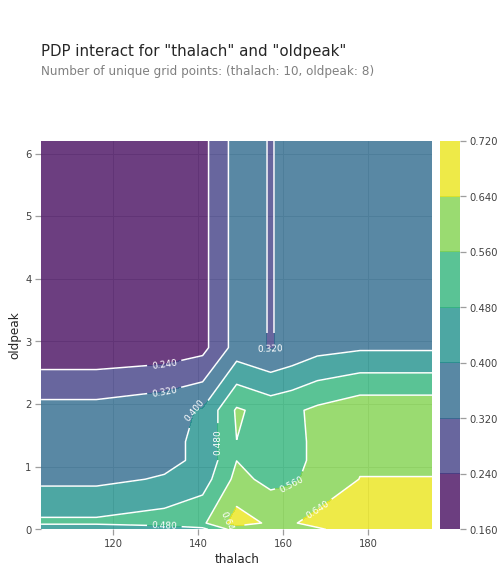

In [0]:
# figure size in inches
rcParams['figure.figsize'] = 10,13
sns.set_style("whitegrid")
pdp_interaction = pdp.pdp_interact(model=lgb_model, dataset=val_X, model_features=val_X.columns.tolist(), features=['thalach', 'oldpeak'])
pdp.pdp_interact_plot(pdp_interact_out=pdp_interaction, feature_names=['thalach', 'oldpeak'], plot_type='contour')
plt.show()

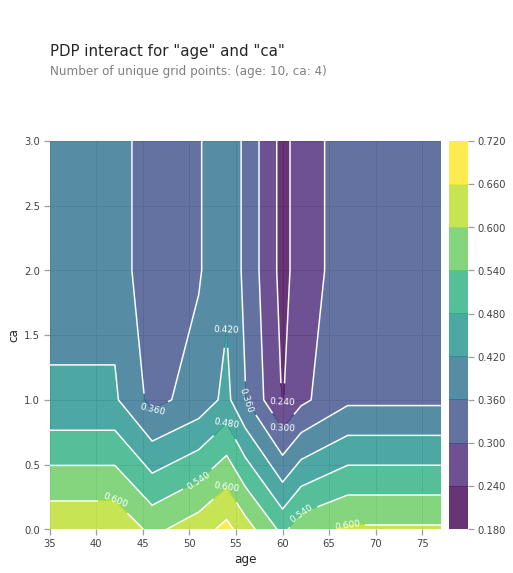

In [0]:
from matplotlib import pyplot as plt
plt.figure(figsize=(15,10))
sns.set_style("whitegrid")
pdp_interaction = pdp.pdp_interact(model=lgb_model, dataset=val_X, model_features=val_X.columns.tolist(), features=['age', 'ca'])
pdp.pdp_interact_plot(pdp_interact_out=pdp_interaction, feature_names=['age', 'ca'], plot_type='contour')
plt.show()

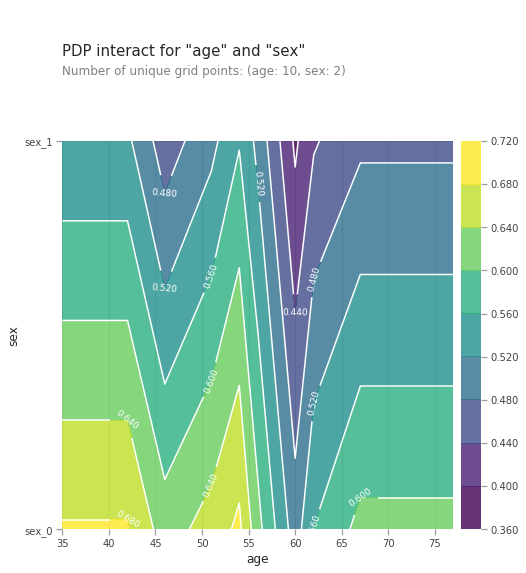

In [17]:
from matplotlib import pyplot as plt
plt.figure(figsize=(15,10))
sns.set_style("whitegrid")
pdp_interaction = pdp.pdp_interact(model=lgb_model, dataset=val_X, model_features=val_X.columns.tolist(), features=['age', 'sex'])
pdp.pdp_interact_plot(pdp_interact_out=pdp_interaction, feature_names=['age', 'sex'], plot_type='contour')
plt.show()

Combined  effect of age and ca , number of major vessels (0-3) colored by flourosopy on heart disease prediction is shown above. Any age combined with low ca number increases the risk of heart disease. This is shown by the yellow colors  just above the horizontal axis. Any age also with high ca number reduces the risk if a heart disease shown by blue and purple regions higher up the chart. The effect of ca number on heart disease prediction is stronger than the age variable.

####  Accumulated Local Effects (ALE) Plot
Accumulated local effects31 describe how features influence the prediction of a machine learning model on average. ALE plots are a faster and unbiased alternative to partial dependence plots (PDPs).

In [0]:
# Plots ALE of feature 'cont' with Monte-Carlo replicas (default : 50)
ale_plot(model, X_train, 'cont', monte_carlo=True)

#### SHapley Additive exPlanations (SHAP) Values

SHAP measures the impact of features taking into account the interaction with other features.
Shapley values calculate the  feature importance by comparing two predictions, one with the feature included and the other without it. The positive SHAP values affect the prediction/target variable positively whereas the negative SHAP values affect the target negatively. The effects of a feature on a single example of the data can also be studied with SHAP values. 
The SHAP method is used to calculate influences of variables on the particular observation. This technique was borrowed from game theory. SHAP is model agnostic, it works with a variety of supervised machine learning models form xgboost, lightgbm, deep learning models.



In [23]:
import xgboost
import shap

# load JS visualization code to notebook
shap.initjs()

# train XGBoost model
#X,y = shap.datasets.boston()
#model = xgboost.train({"learning_rate": 0.01}, xgboost.DMatrix(train_X, label=train_y), 100)

# explain the model's predictions using SHAP values
# (same syntax works for LightGBM, CatBoost, and scikit-learn models)
explainer = shap.TreeExplainer(lgb_model)
shap_values = explainer.shap_values(train_X)

# visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)
shap.force_plot(explainer.expected_value, shap_values[0,:], train_X.iloc[0,:])

The above explanation shows features each contributing to push the model prediction from the base value (the average model prediction over the training dataset we passed) to the model prediction. Features pushing the prediction higher are shown in red, those pushing the prediction lower are in blue .

Exlanations for the whole dataset can be obtained by combining many explanations , rotating  them 90 degrees, and then stacking them horizontally

In [18]:
import random
#select a random row between 0 and 80
#row_to_show = random.randint(0,val_X.shape[0])
row_to_show = 10
data_for_prediction = val_X.iloc[row_to_show]  # use 1 row of data here. Could use multiple rows if desired
data_for_prediction_array = data_for_prediction.values.reshape(1, -1)


lgb_model.predict_proba(data_for_prediction_array)

array([[0.01459534, 0.98540466]])

In [0]:
data_for_prediction.as_matrix()
data_for_prediction.values
explainer.expected_value
shap_values[row_to_show]

array([-0.02539279,  1.20972118, -1.09401723,  0.01115435,  0.14868373,
        0.        ,  0.13053786,  0.54979208,  0.39942117,  0.26785453,
        0.40818999,  1.27388945,  0.5335422 ])

In [0]:
import shap  # package used to calculate Shap values

# Create object that can calculate shap values
explainer = shap.TreeExplainer(lgb_model)

# Calculate Shap values
shap_values = explainer.shap_values(val_X)


# Create object that can calculate shap values
#explainer = shap.TreeExplainer(my_model)

# Calculate Shap values
#shap_values = explainer.shap_values(data_for_prediction)

The shap_values object above is a list with two arrays. The first array is the SHAP values for a negative outcome (don't win the award), and the second array is the list of SHAP values for the positive outcome (wins the award). We typically think about predictions in terms of the prediction of a positive outcome, so we'll pull out SHAP values for positive outcomes (pulling out shap_values[1]).

In [26]:
shap.initjs()
#shap.force_plot(explainer.expected_value, shap_values[row_to_show], data_for_prediction)
shap.force_plot(explainer.expected_value, shap_values[1], data_for_prediction)
#shap.force_plot(explainer.expected_value, shap_values[0,:], val_X.iloc[0,:])

If you look carefully at the code where we created the SHAP values, you'll notice we reference Trees in shap.TreeExplainer(my_model). But the SHAP package has explainers for every type of model.

shap.DeepExplainer works with Deep Learning models.
shap.KernelExplainer works with all models, though it is slower than other Explainers and it offers an approximation rather than exact Shap values.
Here is an example using KernelExplainer to get similar results. The results aren't identical because KernelExplainer gives an approximate result. But the results tell the same story.

In [22]:
# use Kernel SHAP to explain test set predictions
shap.initjs()
k_explainer = shap.KernelExplainer(my_model.predict_proba, train_X)
k_shap_values = k_explainer.shap_values(data_for_prediction)
shap.force_plot(k_explainer.expected_value[1], k_shap_values[1], data_for_prediction)


Using 212 background data samples could cause slower run times. Consider using shap.kmeans(data, K) to summarize the background as K weighted samples.


In [27]:
# visualize the training set predictions
# load JS visualization code to notebook
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values, train_X)

#### Shapley Dependence Plots

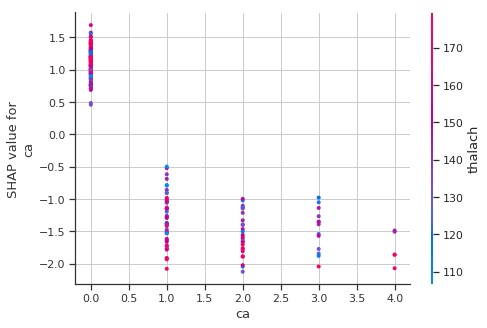

In [0]:
# create a SHAP dependence plot to show the effect of a single feature across the whole dataset
sns.set_style("whitegrid")
shap.dependence_plot("ca", shap_values, train_X)

In [0]:
import shap  # package used to calculate Shap values

# Create object that can calculate shap values
explainer = shap.TreeExplainer(my_model)

# calculate shap values. This is what we will plot.
shap_values = explainer.shap_values(X)

# make plot.
shap.dependence_plot('Ball Possession %', shap_values[1], X, interaction_index="Goal Scored")

The most important features  for the model contributing to the risk of heart disease can be shown by plotting the SHAP values of every feature for every sample. The plot below sorts features by the sum of SHAP value magnitudes over all samples, and uses SHAP values to show the distribution of the impacts each feature has on the model output. The color represents the feature value (red high, blue low)

1. High ca (number of major vessels (0-3) colored by flourosopy) lowers the predicted probabilty of having a heart disease.

2. Belonging to a low  cp (chest pain type) category  lowers the predicted probabilty of having a heart disease.

3. Being a male reduces your chance of a heart disease.

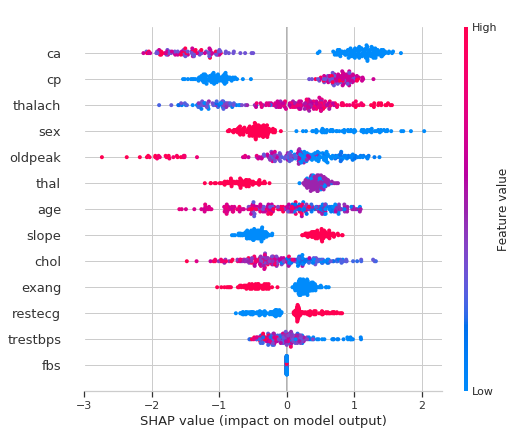

In [0]:
# summarize the effects of all the features
sns.set_style("whitegrid")
shap.summary_plot(shap_values, train_X)


Variable importance plot can be plotted by taking the mean absolute value of the SHAP values for each feature.

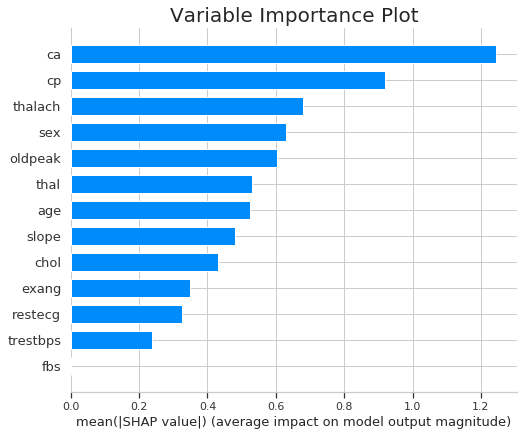

In [0]:
sns.set_style("whitegrid")
plt.title("Variable Importance Plot")
shap.summary_plot(shap_values, train_X, plot_type="bar")


#### Local Interpretable Model-Agnostic Explanations (LIME )
LIME is model-agnostic, meaning that it can be applied to any machine learning model. The  parts of the interpretable input contributing to the prediction is determined by perturbing the input around its neighborhood and observe how the model's predictions change. The perturbed data  is weighed  by their proximity to the original example, and learn an interpretable model on those and the associated predictions. 
 


#### Create the explainer
Tabular explainers use a training set to compute  statistics on each feature.  For continouous features,statistics such as  the mean, standard deviation and discretizing  into quartiles  are computed.Frequency is computed for each categorical feature. The computed statistics are used to scale the data, so that we can meaningfully compute distances when the attributes are not on the same scale. It is also used to  sample perturbed instances - which we do by sampling from a Normal(0,1), multiplying by the std and adding back the mean.





In [0]:
from lime import lime_text
from lime import *
import lime
from sklearn.pipeline import make_pipeline

sns.set_style("whitegrid")
predict_fn_lgbm = lambda x: lgb_model.predict_proba(x).astype(float)

X_val=val_X.as_matrix()

#target_names= ['1','0']
target_names= [str(i) for  i in train_y.unique()]

explainer = lime.lime_tabular.LimeTabularExplainer(X_val, feature_names=train_X.columns.tolist(), class_names=target_names, discretize_continuous=True)

i = np.random.randint(0, val_X.shape[0])
exp = explainer.explain_instance(X_val[i], lgb_model.predict_proba, num_features=10, top_labels=1)

#We now explain a single instance:

exp.show_in_notebook(show_table=True, show_all=False)

#### Plotting Decision Tree

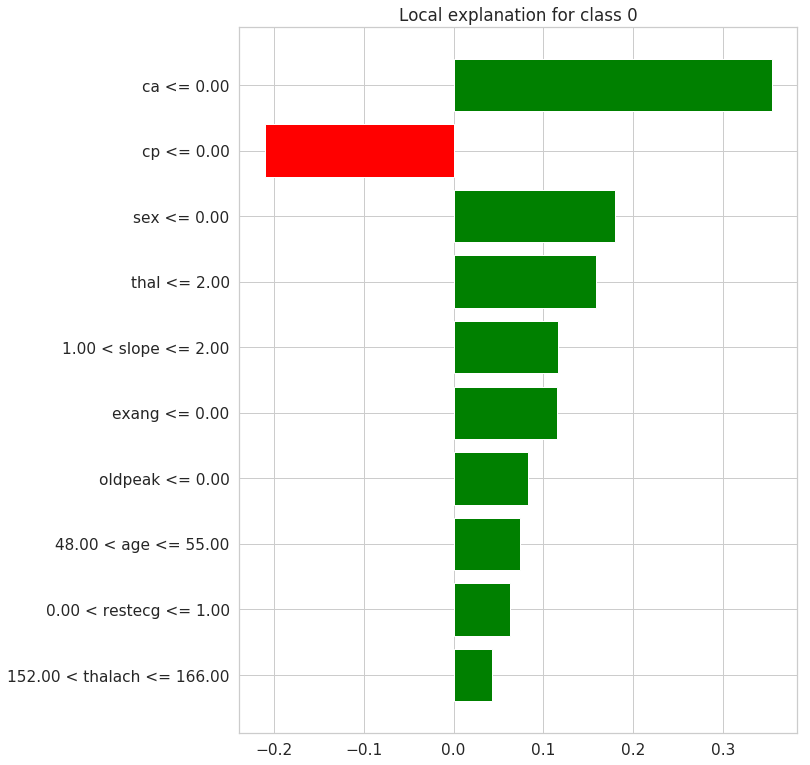

In [0]:
# a plot of the weights for each feature
exp.as_pyplot_figure();

In [0]:
from sklearn.datasets import load_iris
from sklearn import tree
iris = load_iris()
clf = tree.DecisionTreeClassifier()
clf = clf.fit(iris.data, iris.target)
#tree.plot_tree(clf.fit(iris.data, iris.target)) 


import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("iris") 

'iris.pdf'

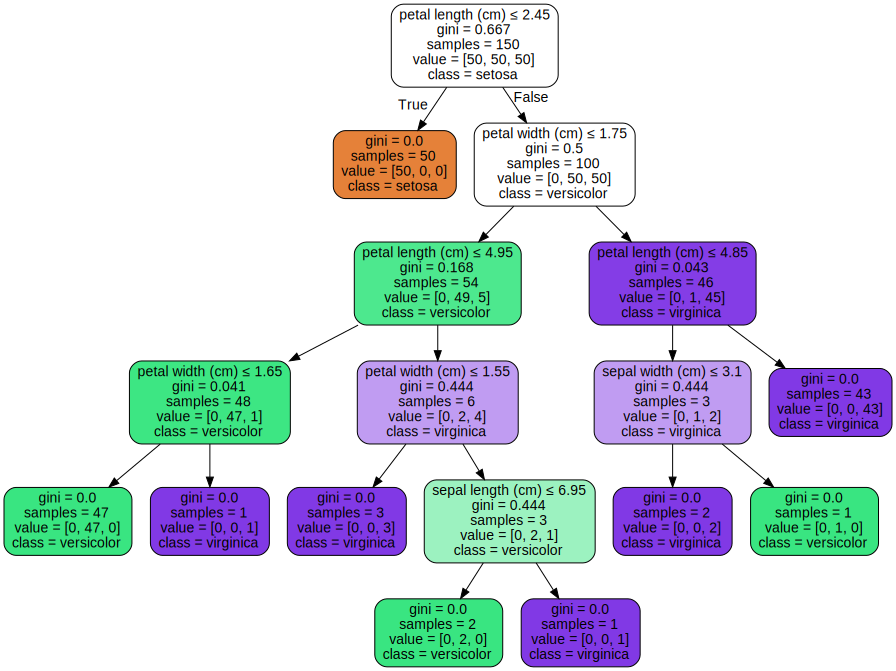

In [0]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                      feature_names=iris.feature_names,  
                      class_names=iris.target_names,  
                      filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

#### Explaining Predictions

For the particular example/row of the feature dataset picked  randomly, the predicted target is not having a heart disease(0) with probability of 0.94. It can be inferred taht the features contributing to this prediction are the Feature Values shown in orange color above. These include ca, sex, cp, slope, thal, oldpeak and exang. The average  probability contribution to the target class predicition from the  individual features are shown in the midlle  barplot above. The remaining features decreases prediction of the target class 0.
